In [1]:
import numpy as np
from numpy.ctypeslib import ndpointer
import matplotlib.pyplot as plt
import pandas as pd
import math as m
import ctypes as ct

def plot(signal):
    n = len(signal)
    x = np.arange(n)
    plt.stem(x, signal)
    plt.grid()
    plt.show()

array = lambda arr: np.asarray(arr, dtype=np.float32) 
print_error = lambda x1, x2: print("Error: ", np.sqrt((x1 - x2) ** 2).mean())
np_fft = lambda x: np.abs(np.fft.fft(x))

lib = ct.CDLL('./lib.so')
argtypes = [ndpointer(np.float32, flags="C_CONTIGUOUS"), ndpointer(np.complex64, flags="C_CONTIGUOUS"), ct.c_size_t]
lib.fft.argtypes = argtypes
lib.fft_parallel.argtypes = argtypes
lib.fft_parallel_opt.argtypes = argtypes

def my_fft(x):
    n = len(x)
    out = np.empty(n, dtype=np.complex64)
    lib.fft(x, out, n)
    return np.abs(out)

def my_fft_parallel(x):
    n = len(x)
    out = np.empty(n, dtype=np.complex64)
    lib.fft_parallel(x, out, n)
    return np.abs(out)

def my_fft_parallel_opt(x):
    n = len(x)
    out = np.empty(n, dtype=np.complex64)
    lib.fft_parallel_opt(x, out, n)
    return np.abs(out)

lib.measure_time.restype = ct.c_double

def measure_time(func, size, nproc=6):
    lib.omp_set_num_threads(nproc)
    return lib.measure_time(func, size)

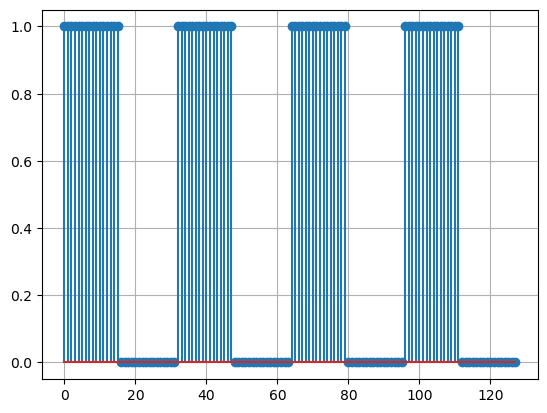

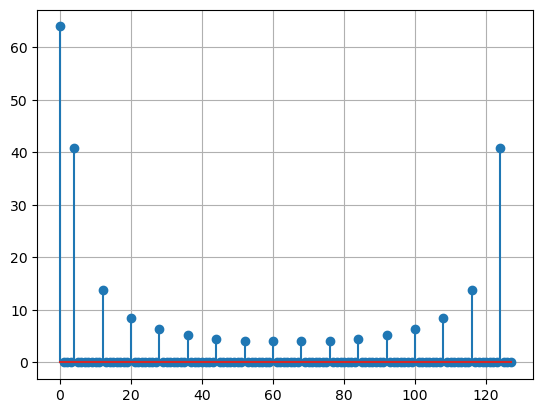

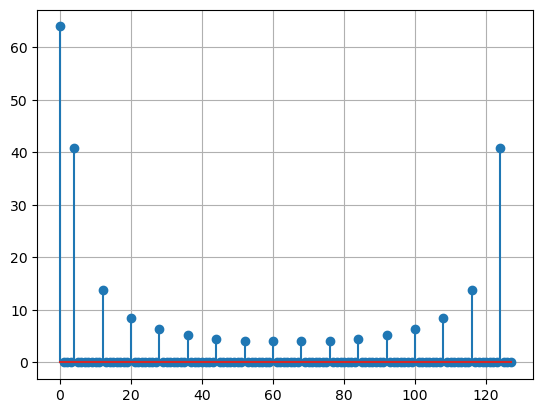

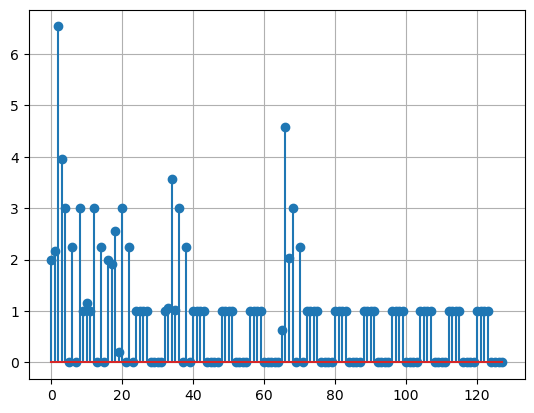

Error:  1.436959623443701e-07
Error:  1.436959623443701e-07
Error:  2.469734005474842


In [2]:
x = np.arange(512)
x = array(((x % 32) < 16))
plot(x)
plot(np_fft(x))
plot(my_fft(x))
plot(my_fft_parallel_opt(x))
print_error(np_fft(x), my_fft(x))
print_error(np_fft(x), my_fft_parallel(x))
print_error(np_fft(x), my_fft_parallel_opt(x))

In [3]:
print(lib.measure_time(lib.fft, 2 ** 22))
print(lib.measure_time(lib.fft_parallel, 2 ** 22))
print(lib.measure_time(lib.fft_parallel_opt, 2 ** 22))

2.4238443010035553
0.41027926599781495
0.10060369100392563
